In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
dat = pd.read_csv("../data/salary.csv") # Binary Classification
dat.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [5]:
dat.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   gender          48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [7]:
dat.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


---

# Handle Missing Values

In [8]:
dat.isna().mean()

age               0.000000
workclass         0.057307
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
gender            0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017546
class             0.000000
dtype: float64

In [9]:
dat.workclass.value_counts(dropna=False)

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NaN                  2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [10]:
dat['workclass'].fillna('Private', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17836\4242782001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dat['workclass'].fillna('Private', inplace=True)


In [11]:
dat.workclass.value_counts()

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [12]:
dat.occupation.value_counts(dropna=False)

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
NaN                  2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [13]:
dat['occupation'].fillna('Unknown', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17836\3846454684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dat['occupation'].fillna('Unknown', inplace=True)


In [14]:
dat['native-country'].value_counts(dropna=False)

native-country
United-States                 43832
Mexico                          951
NaN                             857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [15]:
dat['native-country'].fillna('United-States', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17836\317532913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dat['native-country'].fillna('United-States', inplace=True)


In [16]:
dat.isna().mean()

age               0.0
workclass         0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
gender            0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
class             0.0
dtype: float64

---

# Convert Categorical Variables

In [17]:
# dependence variable -> Object data type 

In [18]:
dat['class'] = dat['class'].map({'<=50K' : 0, '>50K' : 1})

In [19]:
object_list = list()
for i in dat.columns:
    if dat[i].dtype == 'object':
        object_list.append(i)
object_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [20]:
for obj in object_list:
    print(obj, dat[obj].nunique())

workclass 8
education 16
marital-status 7
occupation 15
relationship 6
race 5
gender 2
native-country 41


In [21]:
dat.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1


In [22]:
for edu in dat['education'].unique():
    print(dat[dat['education'] == edu]['education-num'].unique(), edu)

[7] 11th
[9] HS-grad
[12] Assoc-acdm
[10] Some-college
[6] 10th
[15] Prof-school
[4] 7th-8th
[13] Bachelors
[14] Masters
[16] Doctorate
[3] 5th-6th
[11] Assoc-voc
[5] 9th
[8] 12th
[2] 1st-4th
[1] Preschool


In [23]:
# get rid education
dat.drop('education', axis=1, inplace=True)

In [24]:
dat['native-country'].value_counts()

native-country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [25]:
dat['native-country'] = dat['native-country'] == 'United-States'

In [26]:
dat['native-country'] = dat['native-country'].map({True: 'United-States', False: 'Others'})

In [27]:
dat['native-country'].value_counts()

native-country
United-States    44689
Others            4153
Name: count, dtype: int64

In [28]:
object_list.remove('education') # Delete education

In [29]:
object_list

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [30]:
dat = pd.get_dummies(dat, columns=object_list, dtype=int, drop_first=True)

In [31]:
dat.head(3)

,age,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_United-States
0,25,7,0,0,40,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,1
1,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,28,12,0,0,40,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1


---

# Modeling and Estimation

In [32]:
X = dat.drop('class', axis=1)
y = dat['class']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dat.drop('class', axis=1), dat['class'], test_size=0.4, random_state=100)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier()

In [36]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
pred = dt.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
accuracy_score(y_test, pred) # 81%

0.8154783231816554

In [40]:
confusion_matrix(y_test, pred) # Type_1 error, Type_2 error

array([[13065,  1760],
       [ 1845,  2867]], dtype=int64)

In [41]:
y_test.value_counts()

class
0    14825
1     4712
Name: count, dtype: int64

---

# Decision Tree

 ### A decision tree is a type of supervised learning algorithm that is commonly used in machine learning to model and predict outcomes based on input data. It is a tree-like structure where each internal node tests on attribute, each branch corresponds to attribute value and each leaf node represents the final decision or prediction. They can be used to solve both **regression** and **classification** problems.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*U6twhNSe1I37feFfBaeXLw.png">

---

# Overfitting and Underfitting

### Bias : Bias refers to the error due to overly simplistic assumptions in the learning algorithm. When a model has poor performance both on the training and testing data means high bias because of the simple model, indicating **underfitting**.

### Variance : Variance is the error due to the model’s sensitivity to fluctuations in the training data. The model performs well on the training data but poorly on the testing data, indicating **overfitting.**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230829151403/Bias-and-Variance-in-Machine-Learning.webp">

---

# Hyper Parameter Tunning

In [42]:
# If length of tree is more deeper, it can be more overfitting model.(too much leaf node)
# So, you can district length of tree.

In [43]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)



DecisionTreeClassifier()

In [49]:
train_pred = model1.predict(X_train)
test_pred = model1.predict(X_test)


print(f'train_accuracy_score : {accuracy_score(y_train, train_pred)}')
print(f'test_accuracy_score : {accuracy_score(y_test, test_pred)}')
print(f'gap : {round(accuracy_score(y_train, train_pred)- accuracy_score(y_test, test_pred), 2)} ')

train_accuracy_score : 0.9773758744241597
test_accuracy_score : 0.8151200286635615
gap : 0.16 


In [50]:
# Hyper Parameter Tunning
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train, y_train)

train_pred = model2.predict(X_train)
test_pred = model2.predict(X_test)


print(f'train_accuracy_score : {accuracy_score(y_train, train_pred)}')
print(f'test_accuracy_score : {accuracy_score(y_test, test_pred)}')
print(f'gap : {round(accuracy_score(y_train, train_pred)- accuracy_score(y_test, test_pred), 2)} ')

train_accuracy_score : 0.8452141272820338
test_accuracy_score : 0.8424527819010084
gap : 0.0 


---

# Tree(visualization)

In [51]:
from sklearn.tree import plot_tree

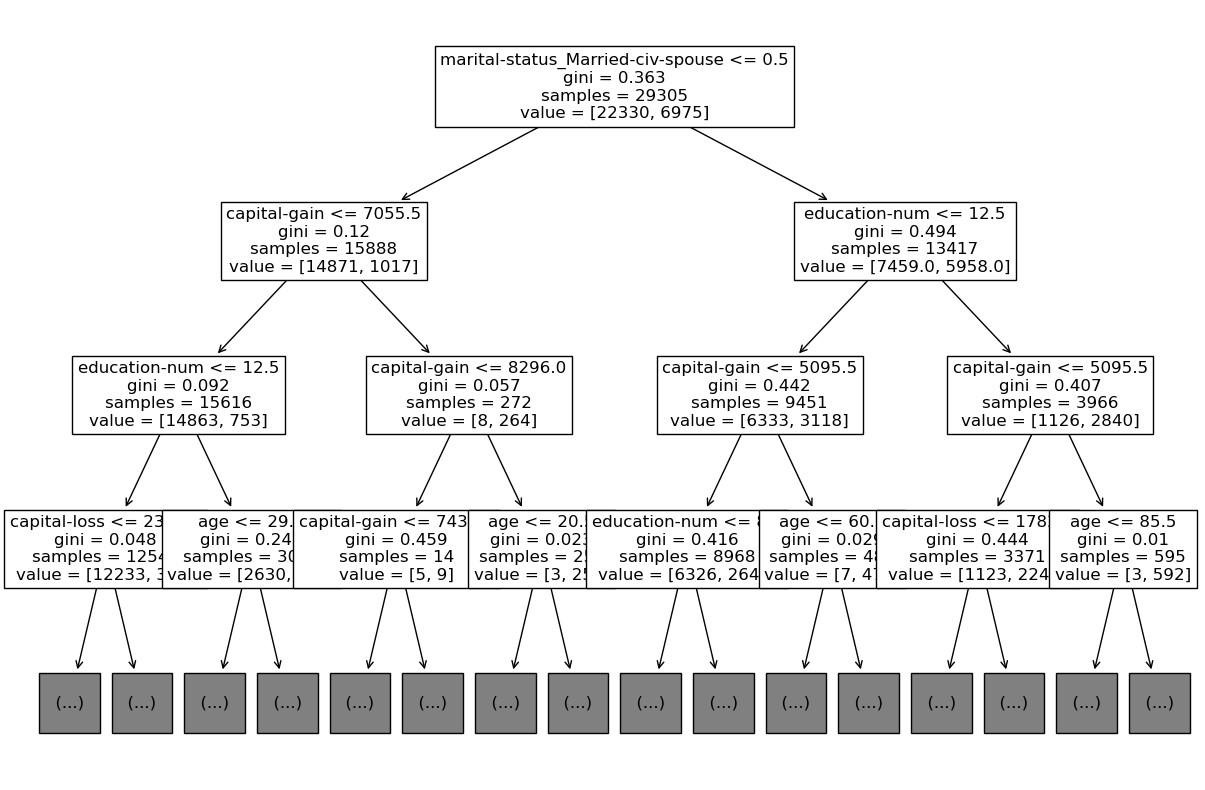

In [59]:
model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(model3, max_depth=3, fontsize=12, feature_names=X_train.columns)
plt.show()

In [ ]:
o